In [2]:
!pip install seaborn

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\janac\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\janac\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\janac\Downloads\Transactions.csv")


In [5]:
# Display basic info and missing values for all datasets
for df, name in [(customers, 'Customers'), (products, 'Products'), (transactions, 'Transactions')]:
    print(f"--- {name} Dataset ---")
    print(df.info())
    print(df.isnull().sum())
    print(df.describe(include='all'))
    print("\n")


--- Customers Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3


--- Products Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
-

CUSTOMER EDA ANALYSIS


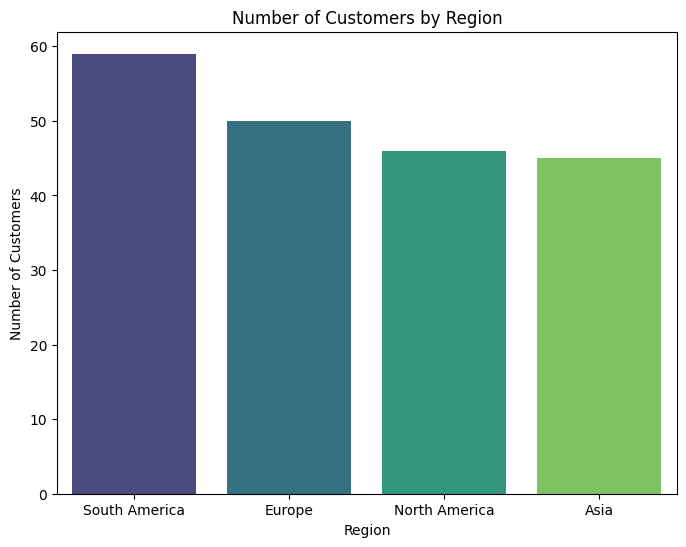

1. Key customer regions: ['South America', 'Europe', 'North America']


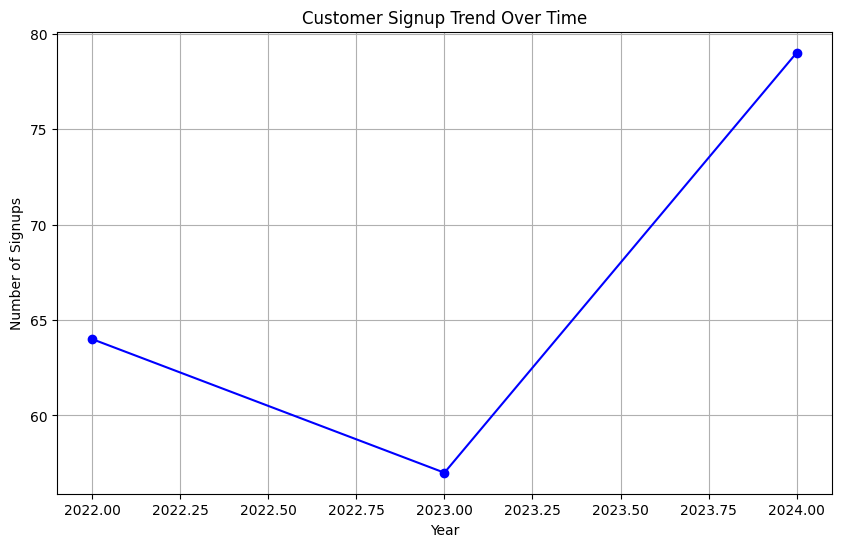

In [26]:
 # Customers by Region

 
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, dodge=False, palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

print("1. Key customer regions:", region_counts.head(3).index.tolist())
# Signup Trend Over Time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year
signup_trend = customers['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o', color='blue')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


PRODUCT EDA ANALYSIS

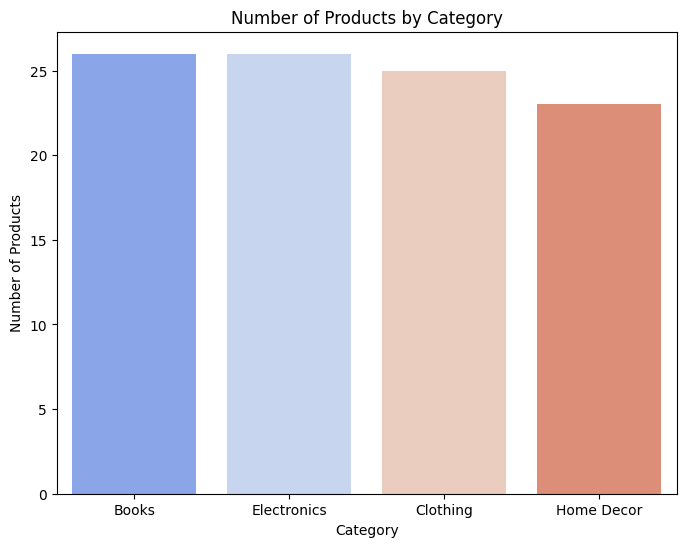

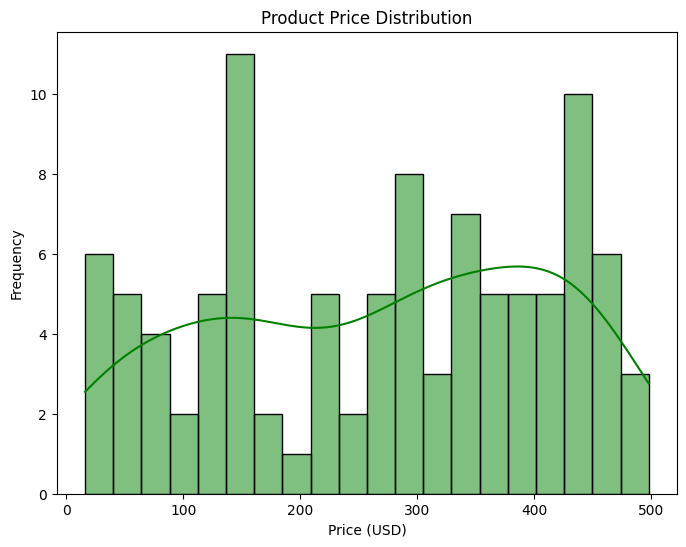

In [11]:
# Products by Category
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm',hue=category_counts.index, dodge=False)
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()
# Product Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='green')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


TRANSACTIONS EDA ANALYSIS

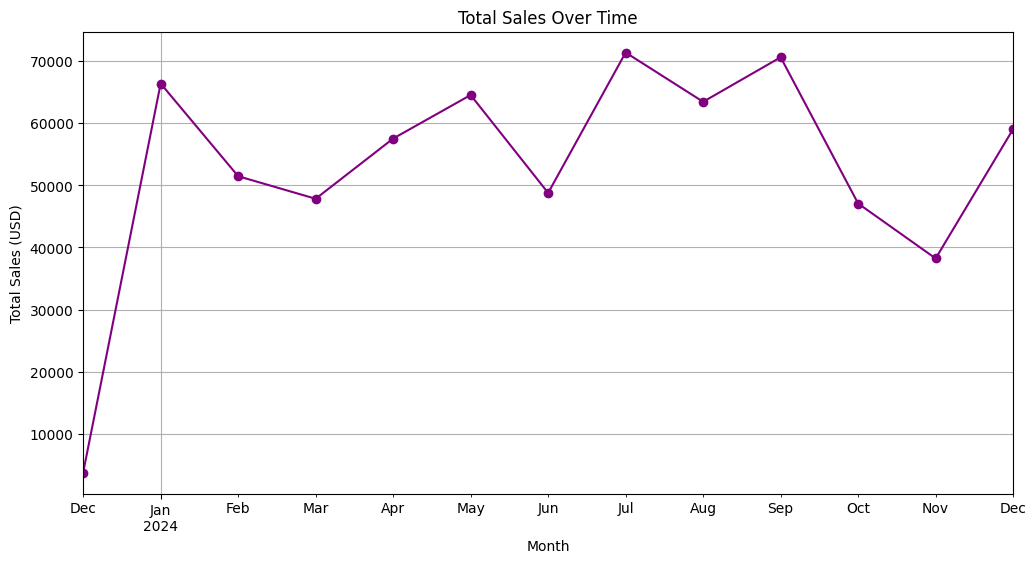

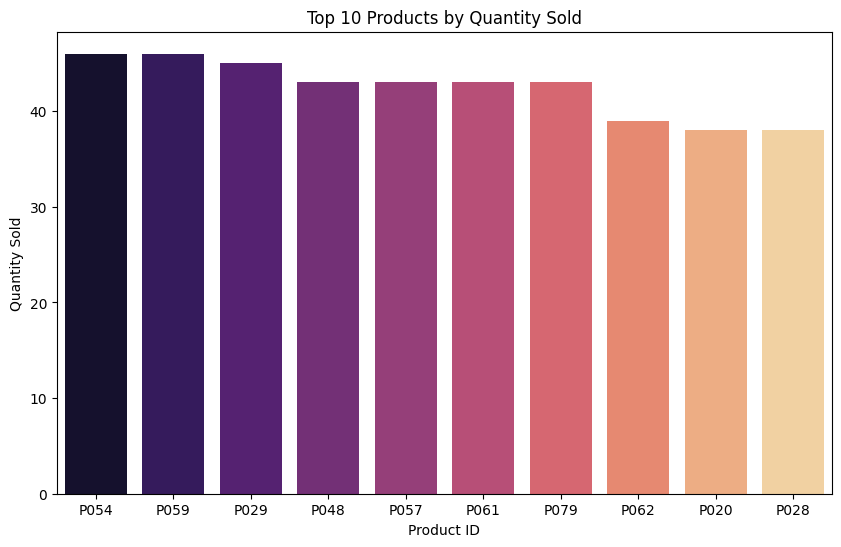

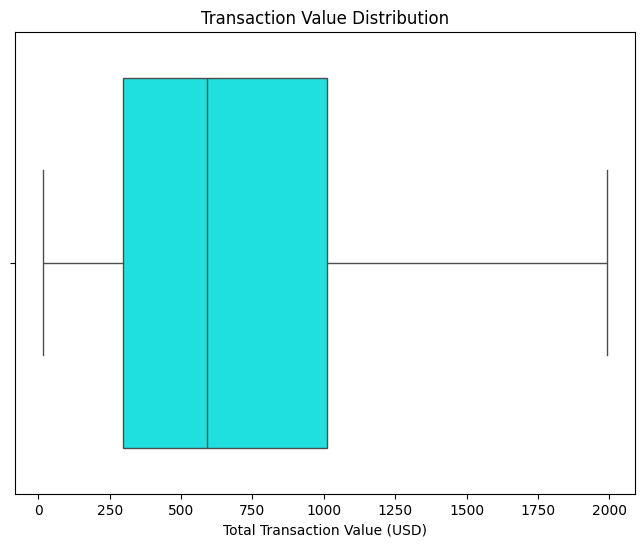

In [13]:
# Total Sales by Month
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

# Top 10 Products by Sales Quantity
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.index, y=popular_products.values, palette='magma',hue= popular_products.index, dodge=False)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.show()

# Transaction Value Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=transactions, x='TotalValue', color='cyan')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Transaction Value (USD)')
plt.show()


Churned Customer Demographics (by Region):
Region
Asia             19
Europe           27
North America    25
South America    27
Name: CustomerID, dtype: int64

Average Purchase Value for Churned Customers: 711.60

Top Products Purchased by Churned Customers:
ProductID
P020    29.0
P059    28.0
P074    28.0
P061    27.0
P022    26.0
P058    25.0
P029    23.0
P040    22.0
P096    21.0
P028    19.0
Name: Quantity, dtype: float64

Time Since Last Purchase for Churned Customers (days):
count     98.000000
mean     155.112245
std       67.284882
min       92.000000
25%      111.000000
50%      134.500000
75%      165.750000
max      389.000000
Name: last_transaction_date, dtype: float64


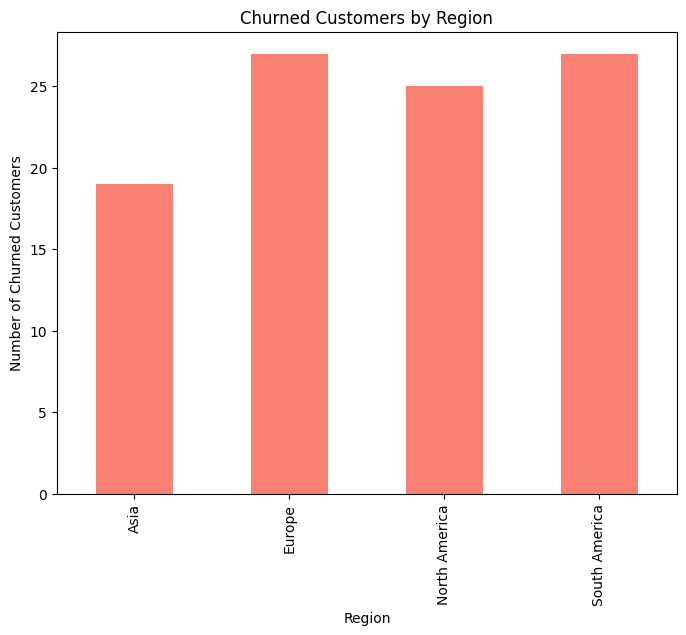

In [21]:
churned_demographics = churned_customers.groupby('Region')['CustomerID'].count()
print("Churned Customer Demographics (by Region):")
print(churned_demographics)

# Analyze churned customers' purchase history
churned_purchases = merged_data[merged_data['CustomerID'].isin(churned_customers['CustomerID'])]
average_purchase_value_churned = churned_purchases.groupby('CustomerID')['TotalValue'].mean().mean()
print(f"\nAverage Purchase Value for Churned Customers: {average_purchase_value_churned:.2f}")

# Analyze product categories purchased by churned customers
churned_product_categories = churned_purchases.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("\nTop Products Purchased by Churned Customers:")
print(churned_product_categories.head(10))

# Analyze the time since last purchase for churned customers
time_since_last_purchase = (pd.to_datetime('today') - churned_customers['last_transaction_date']).dt.days
print("\nTime Since Last Purchase for Churned Customers (days):")
print(time_since_last_purchase.describe())

# Visualization of churned customer demographics
plt.figure(figsize=(8, 6))
churned_demographics.plot(kind='bar', color='salmon')
plt.title('Churned Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Churned Customers')
plt.show()

In [27]:

# 1. Average Order Value (AOV) per Customer
aov_per_customer = transactions.groupby('CustomerID')['TotalValue'].mean()
# Analysis: Identify high-value customers (above-average AOV). Tailor promotions to encourage repeat purchases from these customers.


transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
# Analysis:  Identify peak sales periods (holidays, seasons).  Look for dips and plan strategies to improve sales in slower months.

# 2.. Top-Selling Products and Transaction Values
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
# Analysis: Focus on top-performing products.  Explore bundle deals or promotions for complementary products to increase sales.
transaction_value_stats = transactions['TotalValue'].describe()
# Analysis: Identify reasons for churn and take corrective measures to retain customers.

# 3. Product Performance by Category
product_performance_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
# Analysis: Identify best-performing categories. Analyze less successful categories to understand why. Adjust pricing, marketing or product offerings.

# 4. Regional Sales Performance
regional_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
# Analysis: Identify top-performing regions, and lower performing ones.  Adjust regional marketing and sales strategies.


print("Business Insights Summary:")
print("1. Key customer regions:", region_counts.head(3).index.tolist())
print("2. Average transaction value:", transaction_value_stats['mean'])
print("3. Most popular product categories:", category_counts.head(3).index.tolist())
print("4. Peak sales months:", monthly_sales.idxmax())
print("5. Average Order Value per Customer:", aov_per_customer.mean())   
print("6. Top-performing Product Categories by Total Revenue:", product_performance_by_category.sort_values(ascending=False).head(3))
print("7. Regional sales performance:", regional_sales.sort_values(ascending=False).head())

Business Insights Summary:
1. Key customer regions: ['South America', 'Europe', 'North America']
2. Average transaction value: 689.9955600000001
3. Most popular product categories: ['Books', 'Electronics', 'Clothing']
4. Peak sales months: 2024-07
5. Average Order Value per Customer: 687.5801821245477
6. Top-performing Product Categories by Total Revenue: Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Name: TotalValue, dtype: float64
7. Regional sales performance: Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [22]:
top_products_churned = churned_purchases.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Merge with products DataFrame to get product names
top_products_with_names = pd.merge(top_products_churned, products[['ProductID', 'ProductName']], on='ProductID', how='left')

print("\nTop Products Purchased by Churned Customers (with Product Names):")
top_products_with_names


Top Products Purchased by Churned Customers (with Product Names):


,ProductID,Quantity,ProductName
0,P020,29.0,ActiveWear Jacket
1,P059,28.0,SoundWave Jeans
2,P074,28.0,SoundWave Desk Lamp
3,P061,27.0,HomeSense Desk Lamp
4,P022,26.0,HomeSense Wall Art
5,P058,25.0,ActiveWear Textbook
6,P029,23.0,TechPro Headphones
7,P040,22.0,SoundWave Mystery Book
8,P096,21.0,SoundWave Headphones
9,P028,19.0,HomeSense Desk Lamp
